# Ham Vs Spam

### Abdelmalek Hajjam / Monu Chacko

This data is taken from http://archive.ics.uci.edu/ml/datasets/Spambase and contains data of spam e-mails coming from postmaster and individuals who had filed spam. This collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. 

In [1]:
import nltk
import numpy as np
import pandas as pd
%matplotlib inline

# Read data from file
shdata = pd.read_csv("spambase.csv")

In [2]:
# Examine the same data
shdata.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spamclass
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
print("This dataset contains " + str(shdata.shape[0]) + " rows and " + str(shdata.shape[1]) + " columns")

This dataset contains 4601 rows and 58 columns


In [4]:
# List of columns
print(shdata.columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [5]:
# Get the stats
shdata.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spamclass
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Data Cleanup

We can determine if a given data is ham or spam by looking at spanclass column. 1 would be spam and 0 will not be spam

In [35]:
# Count spam vs. not spam
colspam = len(shdata[shdata.spamclass==1])
colnotspam = len(shdata[shdata.spamclass==0])

print("Count of spam data: %d" %colspam)
print("Count of non spam data: %d" %colnotspam)

Count of spam data: 1813
Count of non spam data: 2788


In [7]:
# null check
shdata[shdata.isnull().any(axis=1)].head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spamclass


### Data Preparation

Split data into test, train, and validate with a split of 70% 15% and 15%

In [8]:
# Split data for test, train, and validate
percTrain = 0.7
percVal = 0.15
percTest = 0.15

N = len(shdata)
trainNum = int(percTrain * N)
valNum = int(percVal * N)
testNum = N - trainNum - valNum

In [9]:
# Validate data from the above split
print("Training target: %d" %trainNum)
print("Validation target: %d" %valNum)
print("Testing target: %d" %testNum)
print("Total: %d" %(trainNum + valNum + testNum))

Training target: 3220
Validation target: 690
Testing target: 691
Total: 4601


In [10]:
# Make splits
from sklearn.cross_validation import train_test_split

trainSet, testSet = train_test_split(shdata, test_size=testNum, random_state=8)
trainSet, valSet = train_test_split(trainSet, test_size=valNum, random_state=88)

c:\Users\moc9029\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# Check lengths
print("Training set: %d" %len(trainSet))
print("Validation set: %d" %len(valSet))
print("Testing set: %d" %len(testSet))
print("Total: %d" %(len(trainSet) + len(valSet) + len(testSet)))

Training set: 3220
Validation set: 690
Testing set: 691
Total: 4601


### Confusion Matrix

Confusion matrix is also called error matrix that allows visualization of the performance of an algorithm. 

- True positives (TP): These are cases in which we predicted yes, and they are not spam.
- True negatives (TN): We predicted no, and they are not spam.
- False positives (FP - Type I error): We predicted yes, but they are not spam.
- False negatives (FN- Type II error): We predicted no, but they are not spam.

In [12]:
def show_model_stats(y_true, y_pred):
    cm = sm.confusion_matrix(y_true, y_pred, labels=[1, 0])
    print("True positives: %d" %cm[0,0])
    print("False positives: %d" %cm[1,0])
    print("True negatives: %d" %cm[1,1])
    print("False negatives: %d" %cm[0,1])
    print(sm.classification_report(y_true, y_pred, labels=[1,0], target_names=["Spam", "Not spam"]))  
    return cm

### Data Analysis

#### Decision Tree

A decision tree is a tree like structure where each internal node is the representation of data i.e spam or not spam.

In [13]:
# Decision tree
from sklearn import tree
import sklearn.metrics as sm
import seaborn as sn
import matplotlib.pyplot as plt

# Train classifier
trainSetClass = trainSet['spamclass']
trainSetVars = trainSet.drop(labels='spamclass', axis=1)
dt = tree.DecisionTreeClassifier(criterion="entropy", random_state=88)
dt_fit = dt.fit(trainSetVars, trainSetClass)

In [14]:
# Training performance
dt_train = dt_fit.predict(trainSetVars)
cm = show_model_stats(trainSetClass, dt_train)

True positives: 1260
False positives: 0
True negatives: 1958
False negatives: 2
             precision    recall  f1-score   support

       Spam       1.00      1.00      1.00      1262
   Not spam       1.00      1.00      1.00      1958

avg / total       1.00      1.00      1.00      3220



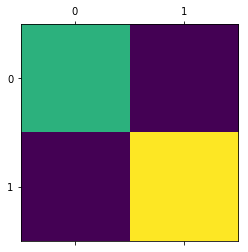

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)

In [16]:
# Decision tree - validation set
valSetClass = valSet['spamclass']
valSetVars = valSet.drop(labels='spamclass', axis=1)

dt_val = dt_fit.predict(valSetVars)
cm = show_model_stats(valSetClass, dt_val)

True positives: 252
False positives: 17
True negatives: 401
False negatives: 20
             precision    recall  f1-score   support

       Spam       0.94      0.93      0.93       272
   Not spam       0.95      0.96      0.96       418

avg / total       0.95      0.95      0.95       690



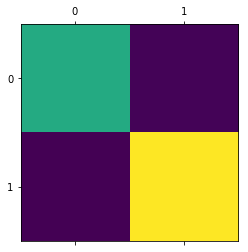

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)

In [18]:
# Decision tree - test set
testSetClass = testSet['spamclass']
testSetVars = testSet.drop(labels='spamclass', axis=1)

dt_test = dt_fit.predict(testSetVars)
cm = show_model_stats(testSetClass, dt_test)

True positives: 251
False positives: 29
True negatives: 383
False negatives: 28
             precision    recall  f1-score   support

       Spam       0.90      0.90      0.90       279
   Not spam       0.93      0.93      0.93       412

avg / total       0.92      0.92      0.92       691



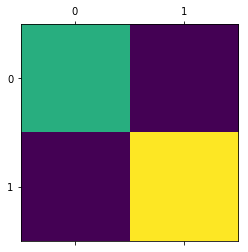

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)

In [20]:
# Check feature importance
def feature_importance(modelfit, setVars): 
    featFit = modelfit.feature_importances_
    df = {'Var': pd.Series(setVars.columns.values), 'Imp': pd.Series(featFit)}
    fi = pd.DataFrame(df, columns=['Var','Imp'])
    return fi.sort_values(['Imp'], ascending=0).head(10)
    

feature_importance(dt_fit, testSetVars)

,Var,Imp
51,char_freq_!,0.296289
52,char_freq_$,0.130370
6,word_freq_remove,0.125547
54,capital_run_length_average,0.056054
55,capital_run_length_longest,0.035736
26,word_freq_george,0.033155
56,capital_run_length_total,0.026242
24,word_freq_hp,0.025670
4,word_freq_our,0.025391
18,word_freq_you,0.024984


#### Random Forest

This is similar to decision tree but Random Forest is a collection of Decision Trees. A decision tree is built on an entire dataset, using all the features/variables of interest, whereas a random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results.

In [21]:
# Random forest - train
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(criterion="entropy", random_state=88)
rf_fit = rf.fit(trainSetVars, trainSetClass)

rf_train = rf_fit.predict(trainSetVars)
cm = show_model_stats(trainSetClass, rf_train)

c:\Users\moc9029\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


True positives: 1248
False positives: 3
True negatives: 1955
False negatives: 14
             precision    recall  f1-score   support

       Spam       1.00      0.99      0.99      1262
   Not spam       0.99      1.00      1.00      1958

avg / total       0.99      0.99      0.99      3220



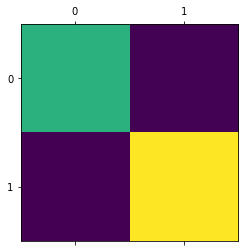

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)

In [23]:
# Random forest - test set
rf_test = rf_fit.predict(testSetVars)
cm = show_model_stats(testSetClass, rf_test)

True positives: 248
False positives: 16
True negatives: 396
False negatives: 31
             precision    recall  f1-score   support

       Spam       0.94      0.89      0.91       279
   Not spam       0.93      0.96      0.94       412

avg / total       0.93      0.93      0.93       691



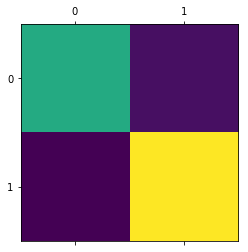

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)

In [25]:
# Random forest feature importance
feature_importance(rf_fit, testSetVars)

,Var,Imp
51,char_freq_!,0.133634
52,char_freq_$,0.110833
55,capital_run_length_longest,0.078106
15,word_freq_free,0.066308
54,capital_run_length_average,0.065711
6,word_freq_remove,0.053635
24,word_freq_hp,0.041705
56,capital_run_length_total,0.036781
25,word_freq_hpl,0.034489
18,word_freq_you,0.033800


#### SVM

Support Vector Machine (SVM) is a supervised learning model with associated learning algorithms that analyze data used for classification and regression analysis.

In [26]:
# SVM - train
from sklearn import svm

sv = svm.SVC(random_state=88)
sv_fit = sv.fit(trainSetVars, trainSetClass)

sv_train = sv_fit.predict(trainSetVars)
cm = show_model_stats(trainSetClass, sv_train)

True positives: 1126
False positives: 52
True negatives: 1906
False negatives: 136
             precision    recall  f1-score   support

       Spam       0.96      0.89      0.92      1262
   Not spam       0.93      0.97      0.95      1958

avg / total       0.94      0.94      0.94      3220



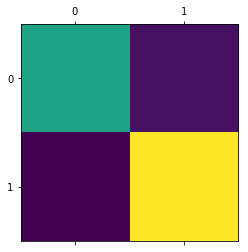

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)

In [28]:
# SVM - test set
sv_test = sv_fit.predict(testSetVars)
cm = show_model_stats(testSetClass, sv_test)

True positives: 214
False positives: 61
True negatives: 351
False negatives: 65
             precision    recall  f1-score   support

       Spam       0.78      0.77      0.77       279
   Not spam       0.84      0.85      0.85       412

avg / total       0.82      0.82      0.82       691



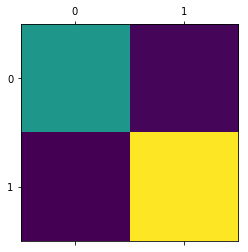

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)

### Summary

- Precision answers the following: How many of those who we labeled as spam are actually spam?
- Recall answers the following question: Of all the spam, how many of those we correctly predict?
- F1 Score is the mean(average) of the precision and recall

All the models had slightly different outcomes. The decision tree performed better in precision, recall and F-Measure (F1 Score). SVM did not performed as well as others. 
